In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D,
    Flatten,
    Dense,
    Dropout,
)
import pickle 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical

Consruct emotion model, download and load weights (Emotion.py in Deepface)

In [2]:
input_dim_ = 64

In [3]:
num_classes = 2

model = Sequential()

# 1st convolution layer
model.add(Conv2D(64, (5, 5), activation="relu", input_shape=(input_dim_, input_dim_, 1)))
# model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))

# 2nd convolution layer
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

# 3rd convolution layer
model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Flatten())

# fully connected neural networks
# model.add(Dense(1024, activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(1024, activation="relu"))
# model.add(Dropout(0.2))

model.add(Dense(num_classes, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Metal device set to: Apple M2


2024-08-23 23:42:47.898355: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-23 23:42:47.898481: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 128)      0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 2)                 3

In [6]:
# load pickle file
files = ['../data_features_labels/EA_annotated_3Blue1Brown_final.pkl']
# files = ['Eastern_Asian_Dataset.pkl']
x_train_list = []
y_train_list = [] 
for file in files:
    with open(file, 'rb') as f:
        features, labels = pickle.load(f)
    
    for pic, label in zip(features, labels):
        # plt.imshow(img_gray, cmap='binary_r')
        x_train_list.append(pic)
        y_train_list.append(label)

In [7]:
X_train = np.array(x_train_list).reshape(-1, input_dim_, input_dim_, 1)
#one-hot encode target column
Y_train = to_categorical(np.array(y_train_list))

In [8]:
Y_train[500].argmax()

0

In [9]:
np.unique(Y_train.argmax(axis=1), return_counts=True)

(array([0, 1]), array([6324, 5323]))

In [10]:
indices = [np.where(Y_train.argmax(axis=1)==i)[0] for i in np.unique(Y_train.argmax(axis=1))]
indices

[array([    0,     1,     2, ..., 11644, 11645, 11646]),
 array([  657,   658,   659, ..., 11623, 11624, 11625])]

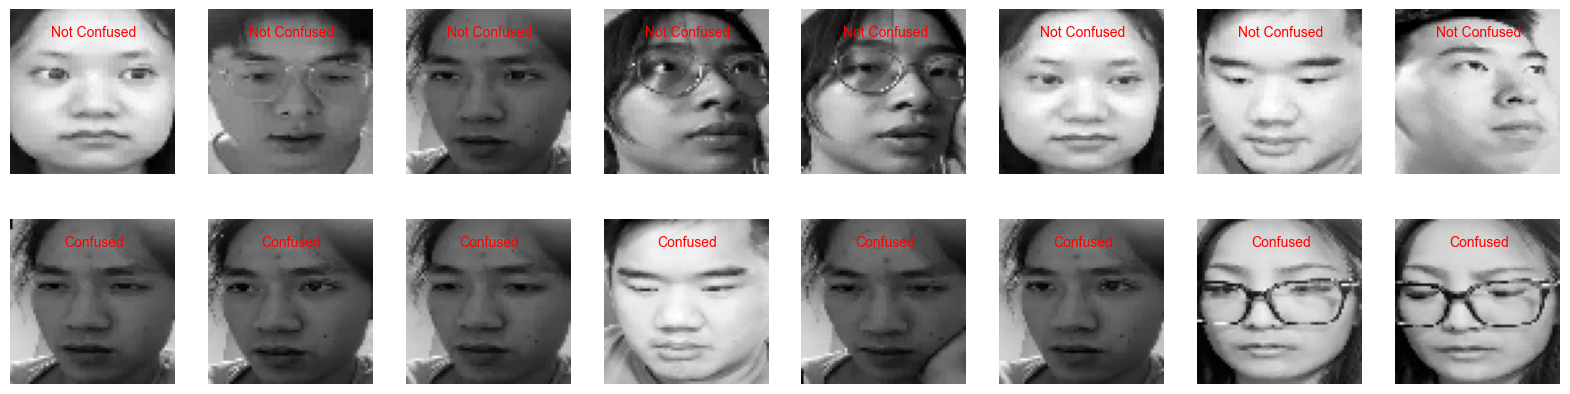

In [11]:
label_names = ['Not Confused', 'Confused']
rows = 2
cols = 8
# num_to_choose = int(rows*cols)
# np.random.seed(42)
# chosen_nums = np.random.choice(np.arange(len(X_train)), size=num_to_choose, replace=False)
fig, ax = plt.subplots(rows, cols, figsize=(20, 5), sharex=True, sharey=True)

for row in range(rows):
    np.random.seed(35)
    # num_to_choose = int(rows*cols)
    chosen_nums = np.random.choice(indices[row], size=cols, replace=False)
    count = 0
    for col in range(cols):
        ax[row, col].imshow(X_train[chosen_nums[count]], cmap='binary_r')
        ax[row, col].text(32, 10, label_names[Y_train[chosen_nums[count]].argmax()], 
                          horizontalalignment='center', color='r')
        count += 1
        
        ax[row, col].axis('off')

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
x_train.shape, x_test.shape

((9317, 64, 64, 1), (2330, 64, 64, 1))

In [13]:
model.fit(x_train, y_train, epochs=200)

2024-08-23 23:43:56.703317: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-08-23 23:43:56.888016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/200
292/292 [==============================] - 6s 21ms/step - loss: 1.2465 - accuracy: 0.8025
Epoch 2/200
292/292 [==============================] - 6s 20ms/step - loss: 0.3377 - accuracy: 0.8517
Epoch 3/200
292/292 [==============================] - 6s 20ms/step - loss: 0.3044 - accuracy: 0.8722
Epoch 4/200
292/292 [==============================] - 6s 20ms/step - loss: 0.2911 - accuracy: 0.8764
Epoch 5/200
292/292 [==============================] - 6s 20ms/step - loss: 0.2947 - accuracy: 0.8765
Epoch 6/200
292/292 [==============================] - 6s 20ms/step - loss: 0.2659 - accuracy: 0.8906
Epoch 7/200
292/292 [==============================] - 6s 20ms/step - loss: 0.2578 - accuracy: 0.8970
Epoch 8/200
292/292 [==============================] - 6s 21ms/step - loss: 0.2372 - accuracy: 0.9039
Epoch 9/200
292/292 [==============================] - 6s 21ms/step - loss: 0.2349 - accuracy: 0.9053
Epoch 10/200
292/292 [==============================] - 6s 21ms/step - loss: 0.277

In [14]:
model.save_weights('asian_confusion_weights_final.h5')

In [15]:
prediction_proba = model.predict(x_test)
y_predict = prediction_proba.argmax(axis=1)

2024-08-24 00:13:54.745798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [16]:
y_predict.shape

(2330,)

In [17]:
y_true = y_test.argmax(axis=1)

In [18]:
# confusion matrix
conf_mat = confusion_matrix(y_true, y_predict, normalize='true')

In [19]:
print(classification_report(y_true, y_predict, target_names=label_names))

              precision    recall  f1-score   support

Not Confused       0.95      0.96      0.96      1263
    Confused       0.95      0.94      0.95      1067

    accuracy                           0.95      2330
   macro avg       0.95      0.95      0.95      2330
weighted avg       0.95      0.95      0.95      2330



In [25]:
label_names = ['Not Confused', 'Confused']

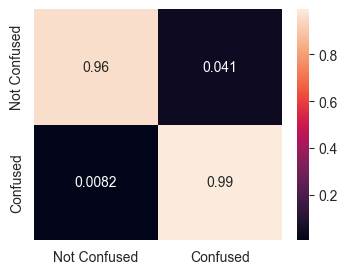

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

sns.heatmap(conf_mat, xticklabels= label_names, 
            yticklabels= label_names, annot=True, ax=ax)
fig.savefig('asian_confused_model_performance_all.svg', bbox_inches = 'tight', dpi=300)

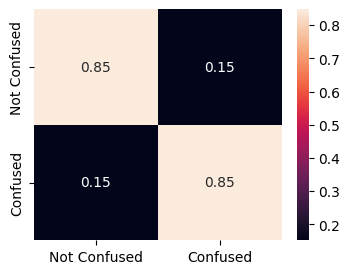

## if not diagonal, False~
## positive or negative depends on references --> is that in the same column, if so positive

In [8]:
X_train = np.array(x_train_list).reshape(-1, input_dim_, input_dim_, 1)

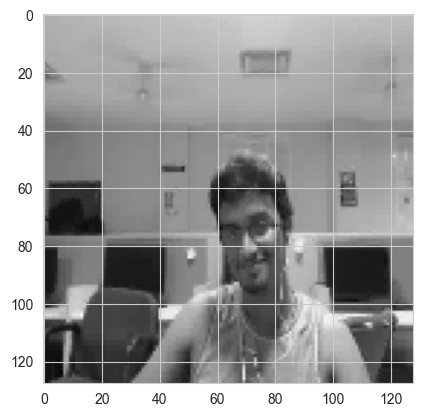

In [34]:
# X_train.shape = (5358, 48, 48, 1)
# X_test.shape = (x_test, 48, 48, 1)
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

In [35]:
# load pickle file
with open('Test.pkl', 'rb') as f:
    test_features, test_labels = pickle.load(f)

In [36]:
x_test_list = []
y_test_list = []
for pic, label in zip(test_features, test_labels):
    # plt.imshow(img_gray, cmap='binary_r')
    x_test_list.append(pic)
    y_test_list.append(label)

In [37]:
X_test = np.array(x_test_list).reshape(-1, input_dim_, input_dim_, 1)

In [38]:
X_test.shape

(5376, 128, 128, 1)

In [39]:
# load pickle file
with open('Validation.pkl', 'rb') as f:
    valid_features, valid_labels = pickle.load(f)

In [40]:
x_valid_list = []
y_valid_list = []
for pic, label in zip(valid_features, valid_labels):
    # plt.imshow(img_gray, cmap='binary_r')
    x_valid_list.append(pic)
    y_valid_list.append(label)

In [41]:
X_valid = np.array(x_valid_list).reshape(-1, input_dim_, input_dim_, 1)

In [42]:
X_valid.shape

(4005, 128, 128, 1)

<AxesSubplot: xlabel='y', ylabel='count'>

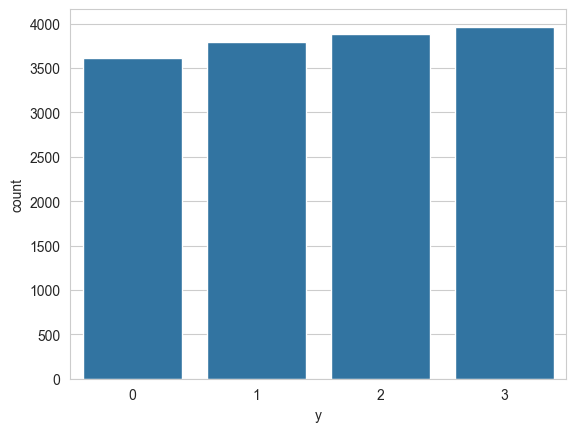

In [43]:
df = pd.DataFrame({'y': y_train_list})
sns.countplot(data=df, x='y')

<AxesSubplot: xlabel='y', ylabel='count'>

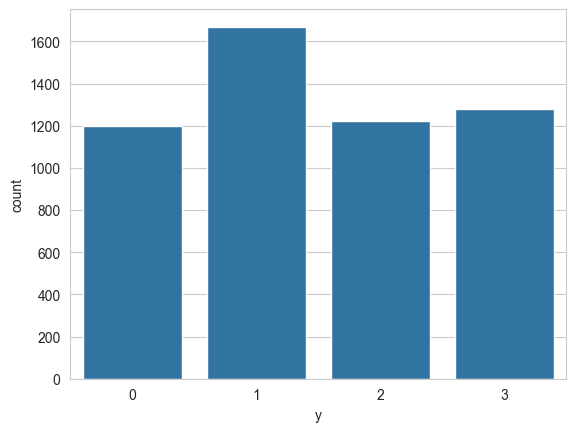

In [44]:
df = pd.DataFrame({'y': y_test_list})
sns.countplot(data=df, x='y')

<AxesSubplot: xlabel='y', ylabel='count'>

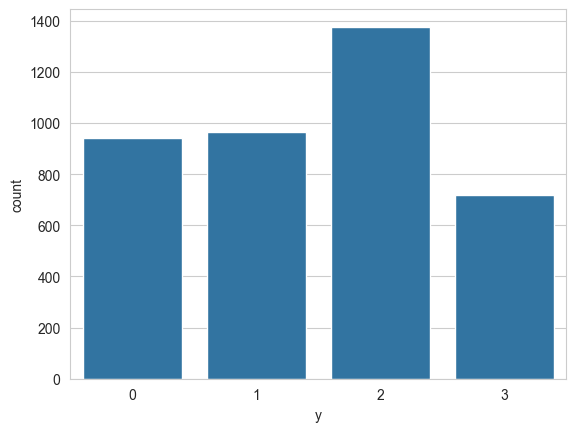

In [45]:
df = pd.DataFrame({'y': y_valid_list})
sns.countplot(data=df, x='y')

In [46]:
np.array(y_train_list).shape

(15255,)

In [73]:
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
Y_train = to_categorical(np.array(y_train_list))
Y_test = to_categorical(np.array(y_test_list))
Y_validation = to_categorical(np.array(y_valid_list))
Y_train[200]

array([0., 1., 0., 0.], dtype=float32)

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((12204, 128, 128, 1), (3051, 128, 128, 1))

In [81]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30


2024-05-19 21:02:59.502562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


382/382 [==============================] - 55s 143ms/step - loss: 5.2598 - accuracy: 0.5629
Epoch 2/30
382/382 [==============================] - 51s 134ms/step - loss: 0.6590 - accuracy: 0.7373
Epoch 3/30
382/382 [==============================] - 54s 140ms/step - loss: 0.5048 - accuracy: 0.8017
Epoch 4/30
 31/382 [=>............................] - ETA: 56s - loss: 0.3475 - accuracy: 0.8609

KeyboardInterrupt: 

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 124, 124, 64)      1664      
                                                                 
 conv2d_15 (Conv2D)          (None, 122, 122, 32)      18464     
                                                                 
 flatten_4 (Flatten)         (None, 476288)            0         
                                                                 
 dense_9 (Dense)             (None, 4)                 1905156   
                                                                 
Total params: 1,925,284
Trainable params: 1,925,284
Non-trainable params: 0
_________________________________________________________________


In [82]:
prediction_proba = model.predict(x_test)
y_predict = prediction_proba.argmax(axis=1)

 2/96 [..............................] - ETA: 7s 

2024-05-19 21:05:49.043001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 2s 24ms/step


In [83]:
y_predict.shape

(3051,)

In [84]:
y_true = y_test.argmax(axis=1)

In [85]:
# y_true = np.array(y_test_list)

In [86]:
# confusion matrix
conf_mat = confusion_matrix(y_true, y_predict, normalize='true')

<AxesSubplot: >

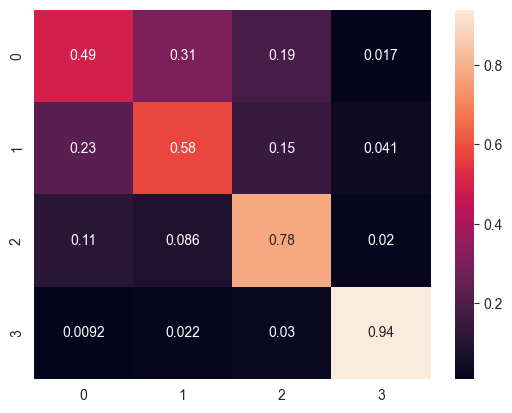

In [87]:
sns.heatmap(conf_mat, annot=True)